In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print('Image Data Shape' , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print('Label Data Shape', digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


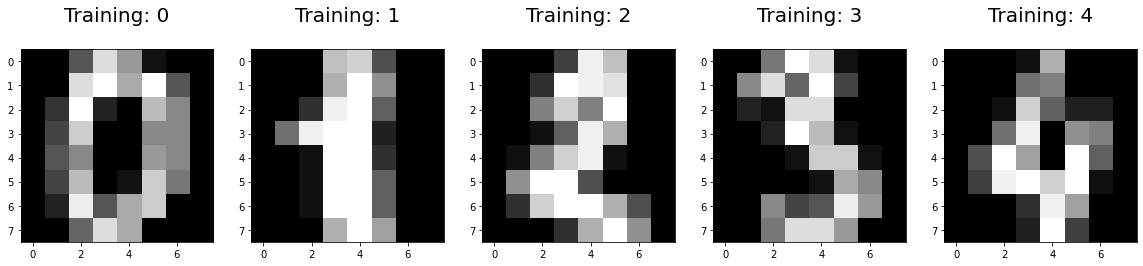

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [32]:
x_train[0]

array([ 0.,  3., 13., 16.,  9.,  0.,  0.,  0.,  0., 10., 15., 13., 15.,
        2.,  0.,  0.,  0., 15.,  4.,  4., 16.,  1.,  0.,  0.,  0.,  0.,
        0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  1., 14., 13.,  0.,  0.,
        0.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  4., 16., 13.,
        8., 10.,  9.,  1.,  0.,  2., 16., 16., 14., 12.,  9.,  1.])

In [8]:
from xgboost import XGBClassifier

xgboost_classifier = XGBClassifier()
xgboost_classifier.fit(x_train, y_train)

[20:00:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [9]:
# Returns a NumPy Array
# Predict for One Observation (image)
xgboost_classifier.predict(x_test[0].reshape(1,-1))

array([2])

In [15]:
xgboost_classifier.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [14]:
predictions = xgboost_classifier.predict(x_test)

In [16]:
score = xgboost_classifier.score(x_test, y_test)
print(score)

0.9555555555555556


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [18]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[36  0  0  0  0  1  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  1]
 [ 1  0 42  0  0  0  0  0  1  0]
 [ 0  0  0 44  0  0  0  0  0  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 50  0  1  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  3  0  2  0  0  0  0 42  1]
 [ 1  0  0  1  0  2  0  0  0 43]]


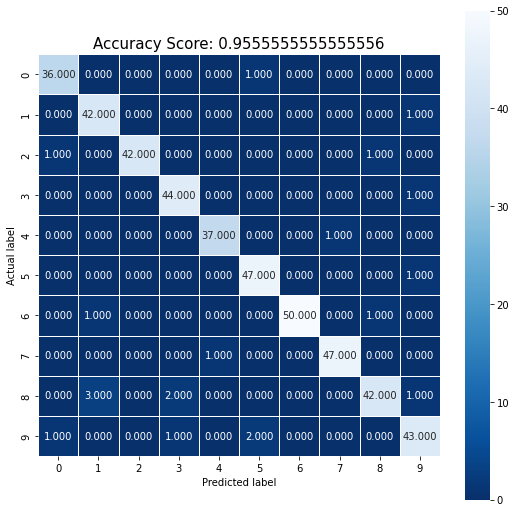

In [19]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [48]:
# Keras

x_train.shape

(1347, 64)

In [54]:
import tensorflow as tf

ds_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
ds_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

model = tf.keras.models.Sequential([
  tf.keras.Input(shape=(64, 1)),
#   tf.keras.layers.Flatten(input_shape=(64,1)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    x_train,
    y_train,
    epochs=6
)

Epoch 1/6


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/usr/local/Cellar/python@3.9/3.9.6/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/local/Cellar/python@3.9/3.9.6/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/local/Cellar/python@3.9/3.9.6/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/usr/local/Cellar/python@3.9/3.9.6/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/usr/local/Cellar/python@3.9/3.9.6/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 461, in dispatch_queue
      await self.process_one()
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 450, in process_one
      await dispatch(*args)
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 357, in dispatch_shell
      await result
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 652, in execute_request
      reply_content = await reply_content
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 359, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2768, in run_cell
      result = self._run_cell(
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2814, in _run_cell
      return runner(coro)
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3012, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3191, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3251, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/7r/72pw73153fq0wxt3j2p7tklh0000gn/T/ipykernel_62659/903645837.py", line 19, in <module>
      model.fit(
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/keras/engine/training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/keras/engine/training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/keras/losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/keras/losses.py", line 1862, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Users/craigperkins/Documents/Northeastern/EAI6080/eai6080/env/lib/python3.9/site-packages/keras/backend.py", line 5202, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [2048,10] and labels shape [32]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_3730]

In [62]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

model = Sequential()
model.add(Dense(100, input_dim=64, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

mnist_dense_2 = model.fit(x_train, y_train, validation_data=(x_test,y_test), 
                                    epochs=50, batch_size=10)


Epoch 1/50
135/135 [==============================] - 1s 3ms/step - loss: 0.7265 - accuracy: 0.8144 - val_loss: 0.2356 - val_accuracy: 0.9133
Epoch 2/50
135/135 [==============================] - 0s 1ms/step - loss: 0.1124 - accuracy: 0.9599 - val_loss: 0.2497 - val_accuracy: 0.9244
Epoch 3/50
135/135 [==============================] - 0s 1ms/step - loss: 0.0593 - accuracy: 0.9807 - val_loss: 0.1195 - val_accuracy: 0.9667
Epoch 4/50
135/135 [==============================] - 0s 1ms/step - loss: 0.0461 - accuracy: 0.9866 - val_loss: 0.1206 - val_accuracy: 0.9600
Epoch 5/50
135/135 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.9985 - val_loss: 0.1349 - val_accuracy: 0.9511
Epoch 6/50
135/135 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0922 - val_accuracy: 0.9711
Epoch 7/50
135/135 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.1014 - val_accuracy: 0.9689
Epoch 

In [69]:
y_prob = model.predict(x_test[0].reshape(1,-1))

y_classes = y_prob.argmax(axis=-1)

y_classes[0]

2

In [70]:
y_prob = model.predict(x_test[0:10])

y_classes = y_prob.argmax(axis=-1)

y_classes

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [71]:
y_prob = model.predict(x_test)

y_classes = y_prob.argmax(axis=-1)


In [72]:
cm = metrics.confusion_matrix(y_test, y_classes)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  1  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  1 44  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  2  1  0  0  1  0  0 44  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


In [76]:
idx = 0
for y_t, y_p in zip(y_test, y_classes):
    if y_t != y_p:
        print(f"y_test[{idx}] (Actual: {y_t}) was predicted incorrectly as {y_p}")
    idx += 1

y_test[118] (Actual: 6) was predicted incorrectly as 1
y_test[124] (Actual: 8) was predicted incorrectly as 1
y_test[130] (Actual: 9) was predicted incorrectly as 5
y_test[181] (Actual: 5) was predicted incorrectly as 9
y_test[331] (Actual: 1) was predicted incorrectly as 6
y_test[335] (Actual: 8) was predicted incorrectly as 2
y_test[378] (Actual: 3) was predicted incorrectly as 2
y_test[398] (Actual: 8) was predicted incorrectly as 1
y_test[437] (Actual: 8) was predicted incorrectly as 5


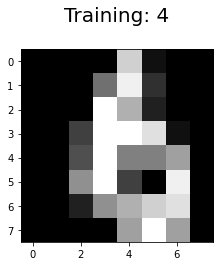

In [80]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
plt.subplot(1, 5, index + 1)
plt.imshow(np.reshape(x_test[118], (8,8)), cmap=plt.cm.gray)
plt.title('Training: %i\n' % label, fontsize = 20)
plt.show()